In [3]:
import os
import soundfile  as sf
import matplotlib.pyplot as plt
import numpy as np
import librosa
from util import audio
import numpy as np

In [11]:
x,fs = sf.read('my_a.wav')
frame_period = 10
X = librosa.stft(x,n_fft=2048, hop_length=int(44100/(1000/frame_period)))
print(X.shape)
xx = librosa.istft(X,hop_length=int(44100/(1000/frame_period)))

(1025, 383)


In [8]:
D_short[0][0]

(-3.3513389+0j)

<Figure size 432x288 with 0 Axes>

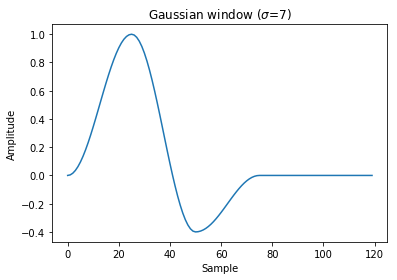

<Figure size 432x288 with 0 Axes>

In [25]:
from scipy import signal
from scipy.fftpack import fft, fftshift

# window = signal.gaussian(51, std=7)
window = np.hanning(51)
x = np.zeros((120,))
x[25-25:25+25+1] = window
x[50-25:50+25+1] -= window*0.4

plt.plot(x)
plt.title(r"Gaussian window ($\sigma$=7)")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.figure()


In [34]:
xlog = np.zeros((120,))
f =range(120)
for i in range(len(xlog)):
    xlog[i] = np.interp(i**1.5, f, x)

<Figure size 432x288 with 0 Axes>

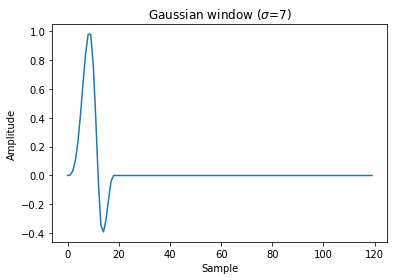

<Figure size 432x288 with 0 Axes>

In [35]:
plt.plot(xlog)
plt.title(r"Gaussian window ($\sigma$=7)")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.figure()

In [40]:
def toDB(x):
    return 20*np.log10(x)
toDB(0.15)

-16.478174818886377